In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [2]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Brain-Tumor/Brain-Tumor-Classification-DataSet-master/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Brain-Tumor/Brain-Tumor-Classification-DataSet-master/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [5]:
train_data_dir = '/content/drive/MyDrive/Brain-Tumor/Brain-Tumor-Classification-DataSet-master/Training'

classes = os.listdir(train_data_dir)
class_counts = {cls: len(os.listdir(os.path.join(train_data_dir, cls))) for cls in classes}
print(class_counts)

{'glioma_tumor': 826, 'meningioma_tumor': 822, 'pituitary_tumor': 827, 'no_tumor': 395}


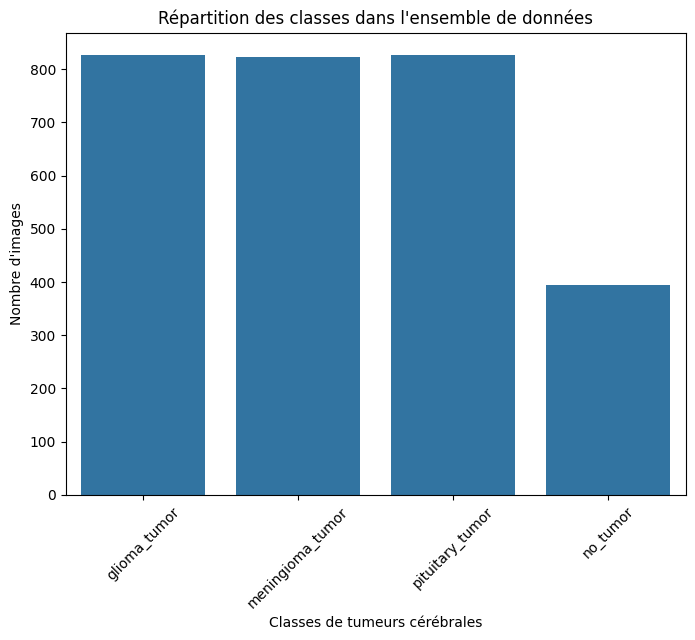

In [6]:
plt.figure(figsize=(8, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title('Répartition des classes dans l\'ensemble de données')
plt.xlabel('Classes de tumeurs cérébrales')
plt.ylabel('Nombre d\'images')
plt.xticks(rotation=45)
plt.show()

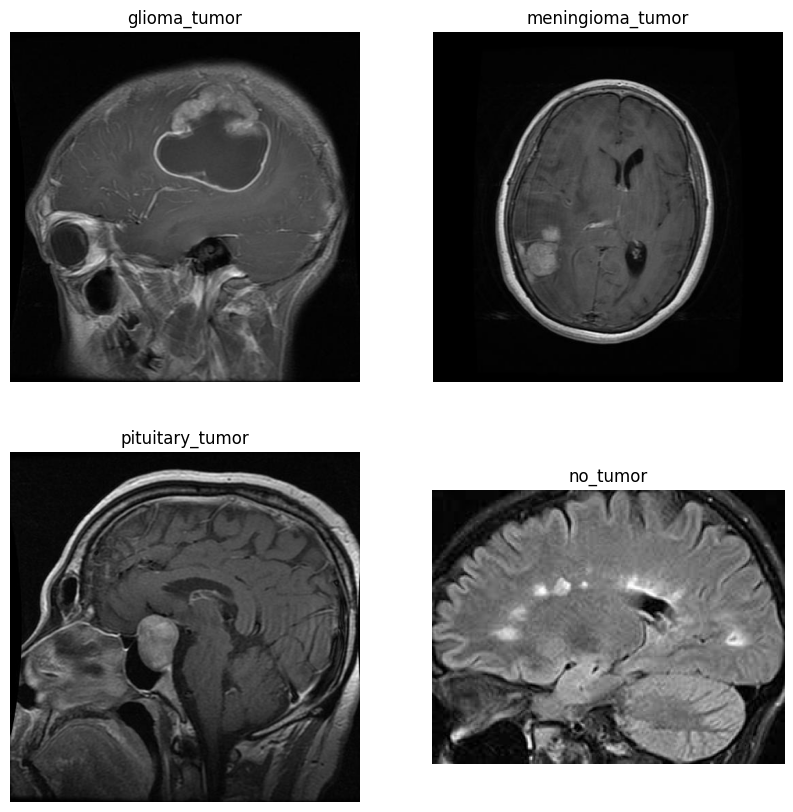

In [7]:
plt.figure(figsize=(10, 10))
for i, cls in enumerate(classes):
    img_path = os.path.join(train_data_dir, cls, os.listdir(os.path.join(train_data_dir, cls))[0])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.show()

In [8]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [10]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 624s 7s/step - loss: 1.9508 - accuracy: 0.3000 - val_loss: 1.3578 - val_accuracy: 0.3980
Epoch 2/20
83/83 [==============================] - 600s 7s/step - loss: 1.2476 - accuracy: 0.4306 - val_loss: 1.2168 - val_accuracy: 0.4558
Epoch 3/20
83/83 [==============================] - 599s 7s/step - loss: 1.0394 - accuracy: 0.5411 - val_loss: 0.9525 - val_accuracy: 0.6361
Epoch 4/20
83/83 [==============================] - 590s 7s/step - loss: 0.8809 - accuracy: 0.6065 - val_loss: 0.8748 - val_accuracy: 0.6633
Epoch 5/20
83/83 [==============================] - 580s 7s/step - loss: 0.8115 - accuracy: 0.6394 - val_loss: 0.8983 - val_accuracy: 0.5816
Epoch 6/20
83/83 [==============================] - 583s 7s/step - loss: 0.6995 - accuracy: 0.6992 - val_loss: 0.6820 - val_accuracy: 0.7211
Epoch 7/20
83/83 [==============================] - 577s 7s/step - loss: 0.6253 - accuracy: 0.7386 - val_loss: 0.5752 - val_accuracy: 0.7823
Epoch 8/20
83

In [17]:
model.save('braintumor.h5')
tf.saved_model.save(model, '/content/drive/MyDrive/model')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


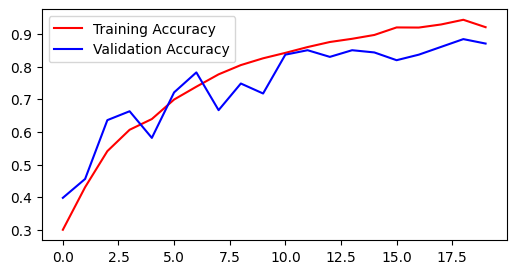

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(6,3))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

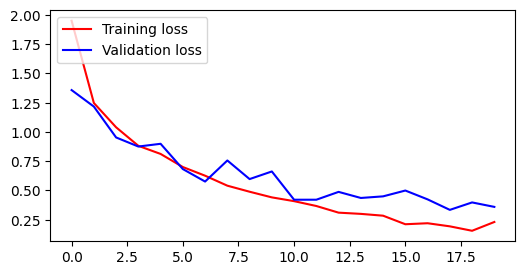

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(6,3))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [20]:
img = cv2.imread('/content/drive/MyDrive/Brain-Tumor/Brain-Tumor-Classification-DataSet-master/Training/meningioma_tumor/m3 (80).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [21]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

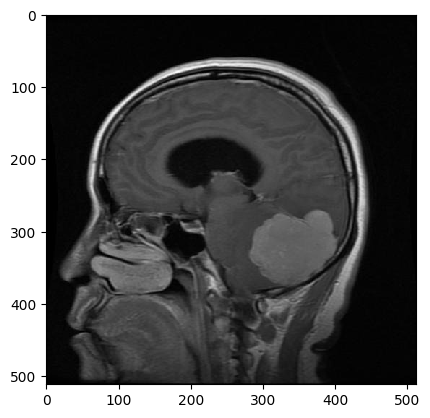

In [22]:
img = image.load_img('/content/drive/MyDrive/Brain-Tumor/Brain-Tumor-Classification-DataSet-master/Training/meningioma_tumor/m3 (80).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [25]:
a = model.predict(img_array)
predicted_class_index = np.argmax(a)
predicted_class_label = labels[predicted_class_index]
print("Predicted Class Label:", predicted_class_label)

1/1 [==============================] - 0s 204ms/step
Predicted Class Label: meningioma_tumor


In [26]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print("Exactitude:", accuracy)
print("Précision:", precision)
print("Rappel:", recall)
print("Score F1:", f1)

11/11 [==============================] - 25s 2s/step
Exactitude: 0.8837920489296636
Précision: 0.8848203884834008
Rappel: 0.8837920489296636
Score F1: 0.8829225201287605


In [ ]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print("Performance sur l'ensemble d'entraînement :")
print("Loss :", train_loss)
print("Accuracy :", train_accuracy)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("\nPerformance sur l'ensemble de test :")
print("Loss :", test_loss)
print("Accuracy :", test_accuracy)